3 wall
2 penguin (all board contains at most 1 penguin)
1 block
0 no block

In [825]:
def initial_board(n, position_penguin = None):
    board = []
    if (not position_penguin):
        position_penguin = [int((n+2)/2), int((n+2)/2)]
        
    for i in range(n+2):
        row = []
        if (i==0 or i==n+1):
            for j in range(n+2):
                row.append(3)
        else:
            row.append(3)
            for j in range(n):
                row.append(1)
            row.append(3)
        board.append(row)

    board[position_penguin[0]][position_penguin[1]] = 2
    
    return board

input: length n of a n x n board, the position [i, j] of penguin on the board
output: array of board size n x n

In [826]:
initial_board(5)

[[3, 3, 3, 3, 3, 3, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 1, 1, 2, 1, 1, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 3, 3, 3, 3, 3, 3]]

In [827]:
initial_board(5, [2,3])

[[3, 3, 3, 3, 3, 3, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 1, 1, 2, 1, 1, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 3, 3, 3, 3, 3, 3]]

In [828]:
def penguin_position(board):
    position_penguin = 0
    for i in range(len(board)):
        for j in range(len(board)):
            if (board[i][j] == 2):
                position_penguin = [i,j]
    # the penguin dies
    if (position_penguin == 0):
        return 0
    
    # the penguin's block has no support
    if ((board[position_penguin[0]-1][position_penguin[1]] == 1 and board[position_penguin[0]+1][position_penguin[1]] == 1) or (board[position_penguin[0]][position_penguin[1]-1] == 1 and board[position_penguin[0]][position_penguin[1]+1] == 1)):
        return position_penguin
    else:
        return 0

input: an array of a board
output: position of -1 (penguin) on the board, 0 otherwise

In [870]:
A = initial_board(5)
A

[3, 3]

In [871]:
penguin_position(A)

[3, 3]

In [874]:
def penguin_die(board):
    if (not penguin_position(board)):
        return True
    else:
        return False

input: an array of a board
output: true if a penguin exists on the board, false otherwise

In [875]:
A = initial_board(5)
penguin_die(A)

False

In [876]:
penguin_position(A)

[3, 3]

In [878]:
A[3][3] = 1
penguin_die(A)

True

In [879]:
def remove_position(board,x,y):
    if (board[x][y] != 0):
        board[x][y] = 0
    #update_board(board, x, y)

In [880]:
A = initial_board(5)

In [881]:
A

[[3, 3, 3, 3, 3, 3, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 1, 1, 2, 1, 1, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 3, 3, 3, 3, 3, 3]]

In [840]:
remove_position(A, 1, 1)

In [841]:
A

[[3, 3, 3, 3, 3, 3, 3],
 [3, 0, 1, 1, 1, 1, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 1, 1, 2, 1, 1, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 3, 3, 3, 3, 3, 3]]

In [882]:
%%capture
def block_fail(board):
    remove = []
    for x in range(len(board)):
        for y in range(len(board)):
            #check position that's not a wall and no block
            if board[x][y] != 3 and board[x][y] != 0:
                if (not ((board[x-1][y] > 0 and board[x+1][y] > 0) or (board[x][y-1] > 0 and board[x][y+1] > 0))):
                    remove.append([x,y])
    return remove;

In [887]:
def update_board(board):
    # if ((board[x-1][y] == 1 and board[x+1][y] == 1) or (board[x][y-1] == 1 and board[x][y+1] == 1)):
    #    return position_penguin
    
    #remove block with no support
    remove = []
    remove = block_fail(board)
#     if (remove == []):
#         return 0
    while(remove != []):
        print(remove)
        for i in range(len(remove)):
            remove_position(board, remove[i][0], remove[i][1])
        remove = block_fail(board)
#     return 1
            

In [888]:
A = initial_board(3)

In [889]:
A

[[3, 3, 3, 3, 3],
 [3, 1, 1, 1, 3],
 [3, 1, 2, 1, 3],
 [3, 1, 1, 1, 3],
 [3, 3, 3, 3, 3]]

In [890]:
block_fail(A)

[]

In [891]:
remove_position(A, 1, 1)
remove_position(A, 1, 2)
remove_position(A, 2, 3)

In [892]:
A

[[3, 3, 3, 3, 3],
 [3, 0, 0, 1, 3],
 [3, 1, 2, 0, 3],
 [3, 1, 1, 1, 3],
 [3, 3, 3, 3, 3]]

In [896]:
B = block_fail(A)
B

[]

In [897]:
update_board(A)

In [898]:
A

[[3, 3, 3, 3, 3],
 [3, 0, 0, 0, 3],
 [3, 0, 0, 0, 3],
 [3, 1, 1, 1, 3],
 [3, 3, 3, 3, 3]]

In [857]:
import random

In [858]:
def pretty_print(board):
    returnString = " "
    divider = "\n---"

    for i in range(0, len(board)):
        returnString += " | " + str(i)
        divider += "----"
    divider += "\n"

    returnString += divider
    for y in range(0, len(board)):
        returnString += str(y)
        for x in range(0, len(board)):
            if (board[x][y] == -1):
                returnString += " | " + "P"
            elif (board[x][y] == 0):
                returnString += " | " + "O"
            else:
                returnString += " |  "
        returnString += " |"
        returnString += divider
    return returnString

In [859]:
nice_board = pretty_print(initial_board(5))

In [860]:
initial_board(5)

[[3, 3, 3, 3, 3, 3, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 1, 1, 2, 1, 1, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 1, 1, 1, 1, 1, 3],
 [3, 3, 3, 3, 3, 3, 3]]

In [861]:
print(nice_board)

  | 0 | 1 | 2 | 3 | 4 | 5 | 6
-------------------------------
0 |   |   |   |   |   |   |   |
-------------------------------
1 |   |   |   |   |   |   |   |
-------------------------------
2 |   |   |   |   |   |   |   |
-------------------------------
3 |   |   |   |   |   |   |   |
-------------------------------
4 |   |   |   |   |   |   |   |
-------------------------------
5 |   |   |   |   |   |   |   |
-------------------------------
6 |   |   |   |   |   |   |   |
-------------------------------



In [862]:
def random_play_stop(board):
    #print(penguin_die(board))
    stop = 0
    while (penguin_die(board) == False):
        stop += 1
        if (stop >= 500):
            break
        rand_x = random.randint(1, len(board)-1)
        rand_y = random.randint(1, len(board)-1)
        if (board[rand_x][rand_y] != 0 and board[rand_x][rand_y] != 3):
            remove_position(board, rand_x, rand_y)
            update_board(board)
        #print(pretty_print(board))
    return stop

In [863]:
def random_play(board):
    #print(penguin_die(board))
    stop = 0
    move = 0
    while (penguin_die(board) == False):
        stop += 1
        if (stop >= 500):
            break
        rand_x = random.randint(1, len(board)-1)
        rand_y = random.randint(1, len(board)-1)
        if (board[rand_x][rand_y] != 0 and board[rand_x][rand_y] != 3):
            remove_position(board, rand_x, rand_y)
            update_board(board)
            move+=1
        #print(pretty_print(board))
    return move

In [864]:
import matplotlib.pyplot as plt

In [865]:
for j in range(10):
    move_list = []
    for i in range(100):
        move_list.append(random_play(initial_board(3)))
    move_list.sort()
    plt.plot(move_list)

[[2, 2], [3, 3]]
[[1, 2]]
[[2, 2], [3, 1]]
[[2, 3], [3, 2]]
[[1, 2], [2, 1], [2, 3]]
[[3, 1]]
[[2, 1], [3, 2]]
[[1, 1]]
[[2, 2], [3, 1]]
[[1, 2], [2, 1]]
[[2, 2], [3, 1]]
[[2, 2], [3, 1]]
[[1, 2], [2, 3]]
[[1, 3]]
[[1, 2], [2, 1], [3, 2]]
[[1, 1], [3, 3]]
[[2, 2], [3, 1]]
[[1, 2], [2, 1], [2, 3], [3, 2]]
[[1, 3], [3, 1]]
[[2, 1]]
[[2, 2]]
[[2, 1], [3, 2]]
[[1, 1]]
[[2, 2], [3, 3]]
[[2, 2], [3, 3]]
[[1, 2], [2, 1]]
[[1, 3], [3, 1]]
[[2, 2]]
[[1, 2], [2, 1]]
[[2, 1], [2, 3]]
[[1, 3], [3, 1]]
[[1, 2], [3, 2]]
[[1, 1]]
[[2, 2]]
[[3, 2]]
[[2, 3]]
[[1, 2], [2, 1], [2, 3], [3, 2]]
[[3, 1]]
[[1, 2], [2, 3], [3, 2]]
[[1, 1], [3, 3]]
[[1, 2], [2, 1], [2, 3], [3, 2]]
[[3, 3]]
[[1, 3], [2, 2]]
[[2, 2]]
[[1, 2]]
[[1, 2], [2, 1], [2, 3], [3, 2]]
[[3, 1]]
[[2, 2], [3, 1]]
[[2, 3]]
[[1, 3], [2, 2]]
[[3, 2]]
[[2, 2], [3, 3]]
[[2, 1]]
[[3, 1]]
[[2, 2]]
[[1, 2], [2, 1]]
[[1, 3], [2, 2]]
[[3, 2]]
[[2, 2], [3, 1]]
[[1, 3], [2, 2], [3, 3]]
[[2, 1]]
[[1, 1], [2, 2]]
[[2, 3], [3, 2]]
[[3, 1]]
[[2, 2], [3, 1]]

[[1, 2], [3, 2]]
[[3, 3]]
[[1, 1], [2, 2]]
[[3, 2]]
[[3, 1]]
[[2, 2]]
[[2, 1]]
[[2, 2], [3, 1]]
[[1, 2], [2, 3]]
[[1, 3]]
[[2, 2]]
[[1, 2], [2, 3]]
[[1, 1], [3, 3]]
[[1, 3], [2, 2], [3, 3]]
[[2, 1]]
[[1, 2], [2, 1]]
[[2, 1], [2, 3], [3, 2]]
[[2, 2], [3, 1]]
[[2, 3]]
[[1, 2], [2, 1], [3, 2]]
[[3, 1]]
[[1, 1], [1, 3], [2, 2]]
[[1, 2], [2, 1]]
[[3, 1]]
[[2, 2], [3, 3]]
[[2, 2]]
[[1, 1], [2, 2]]
[[2, 3], [3, 2]]
[[1, 3], [3, 1]]
[[1, 2], [2, 3]]
[[2, 2]]
[[1, 2]]
[[2, 3], [3, 2]]
[[1, 3]]
[[2, 2]]
[[3, 2]]
[[2, 1], [2, 3], [3, 2]]
[[1, 3], [2, 2]]
[[3, 2]]
[[1, 3], [2, 2]]
[[2, 1], [3, 2]]
[[3, 3]]
[[2, 1], [2, 3], [3, 2]]
[[2, 2], [3, 1]]
[[1, 2], [3, 2]]
[[1, 1]]
[[2, 2]]
[[2, 3]]
[[1, 2], [2, 1], [3, 2]]
[[3, 1]]
[[2, 3]]
[[1, 2], [2, 1], [2, 3], [3, 2]]
[[1, 3]]
[[1, 3], [2, 2], [3, 3]]
[[2, 1]]
[[3, 1]]
[[2, 2]]
[[1, 2], [2, 3]]
[[3, 3]]
[[1, 1], [2, 2]]
[[2, 2]]
[[2, 3], [3, 2]]
[[3, 3]]
[[1, 2], [2, 3], [3, 2]]
[[1, 3]]
[[3, 2]]
[[3, 1]]
[[2, 2]]
[[2, 3], [3, 2]]
[[3, 3]]
[[1, 1], [

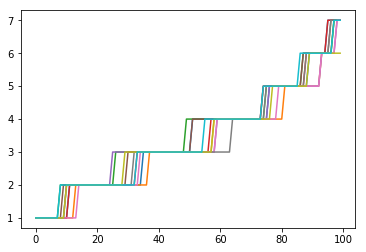

In [866]:
plt.show()